In [133]:
import pandas
from datetime import datetime as dt
from pytz import utc

#Use pandas to read data from csv file into dataframe
#parse_dates tells df to read particular column as a datetime object column
df = pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])
df

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN


## Rating average and count by day

In [134]:
#Create a new column for the date which is taken from the timestamp datetime object
#This is done so we can then group data by the day value
df["Day"] = df["Timestamp"].dt.date

#We then group the data by the "Day" column and find the mean rating of each group
#day_avg = df.groupby(["Day"])["Rating"].mean()
day_avg = df.groupby(["Day"]).mean()  #.mean() only works with columns that have numbers thus only rating appears
day_avg.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


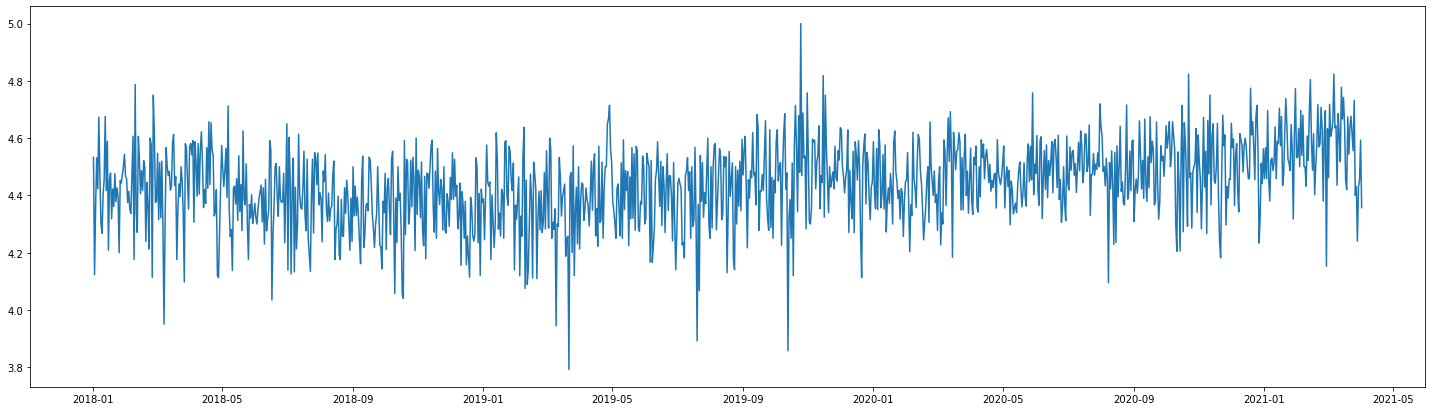

In [135]:
import matplotlib.pyplot as plt

#Gives the plotted graph a size -> 25 length and 7 height
plt.figure(figsize=(25,7))

#plot function takes a list of x and y coordinates
#x coordinates are the day values -> index of the dataframe
#y coordinates are the ratings for each day value
plt.plot(day_avg.index, day_avg["Rating"])

#It reads data and finds min and max values and plots only between them
#day_avg["Rating"].min()
#day_avg["Rating"].max()

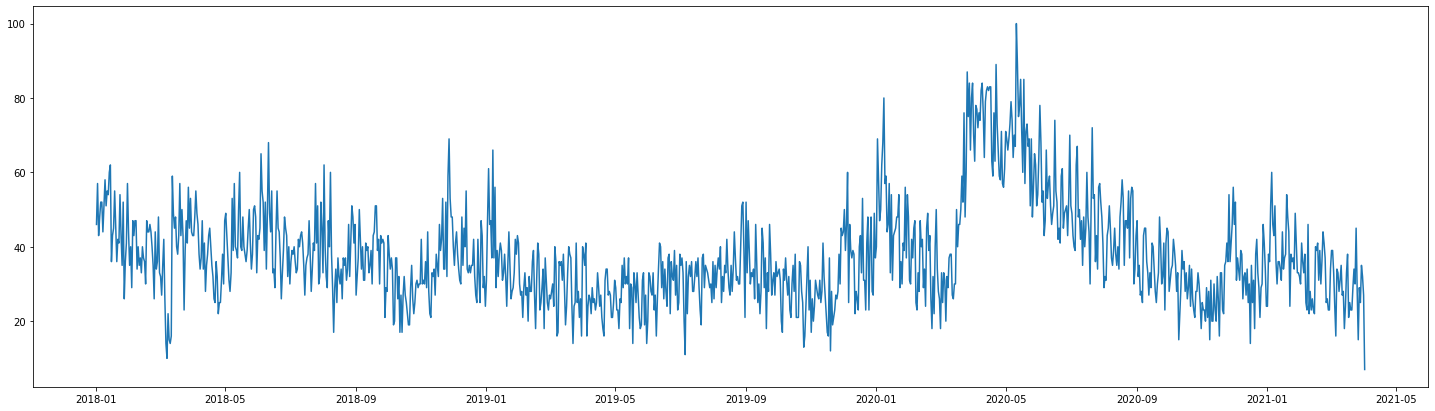

In [136]:
#We also group the data by the "Day" column and count how many of each data occured each day
day_avg = df.groupby(["Day"]).count()  #.count() gives a count of all columns that can be counted

#Gives the plotted graph a size -> 25 length and 7 height
plt.figure(figsize=(25,7))

#If we plot the count method dataframe we will get a graph of number of ratings per day
#plot function takes a list of x and y coordinates
plt.plot(day_avg.index, day_avg["Rating"])

## Rating average by week

In [137]:
#Create a new column for the week which is taken from the timestamp datetime object
#This is done so we can then group data by the week value
#We split the timestamp using strftime to get year and week (Otherwise same weeks in different years count as one)
#%Y gets time and %U gets the week value
df["Week"] = df["Timestamp"].dt.strftime("%Y-%U")

#Group the data by the week column and find its mean
week_avg = df.groupby(["Week"]).mean()

#Thus we get a dataframe with the week column as the index and the mean ratings per week
week_avg

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


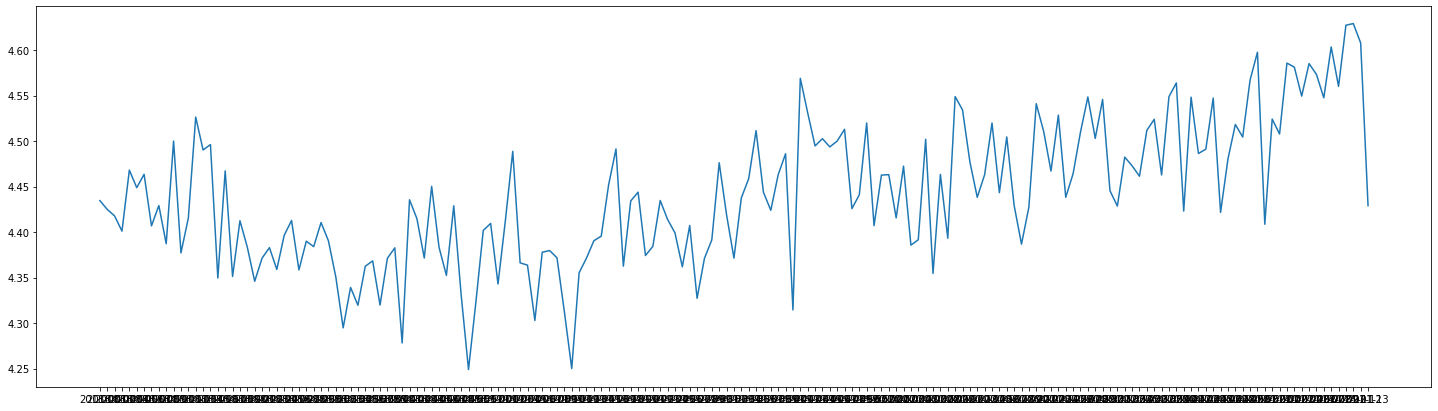

In [138]:
#Gives the plotted graph a size -> 27 length and 7 height
plt.figure(figsize=(25,7))

#plot function takes a list of x and y coordinates
#We plot the weeks w.r.t the mean ratings per week
plt.plot(week_avg.index, week_avg["Rating"])

## Rating average by month

In [139]:
#Create a new column for the month which is taken from the timestamp datetime object
#This is done so we can then group data by the month value
#We split the timestamp using strftime to get year and month (Otherwise same months in different years count as one)
#%Y gets time and %m gets the month value
df["Month"] = df["Timestamp"].dt.strftime("%Y-%m")

#Group the data by the Month column and find its mean
mon_avg = df.groupby(["Month"]).mean()

#Thus we get a dataframe with the month column as the index and the mean ratings per month
mon_avg

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420
2018-06,4.375379
2018-07,4.393184
2018-08,4.344753
2018-09,4.347247


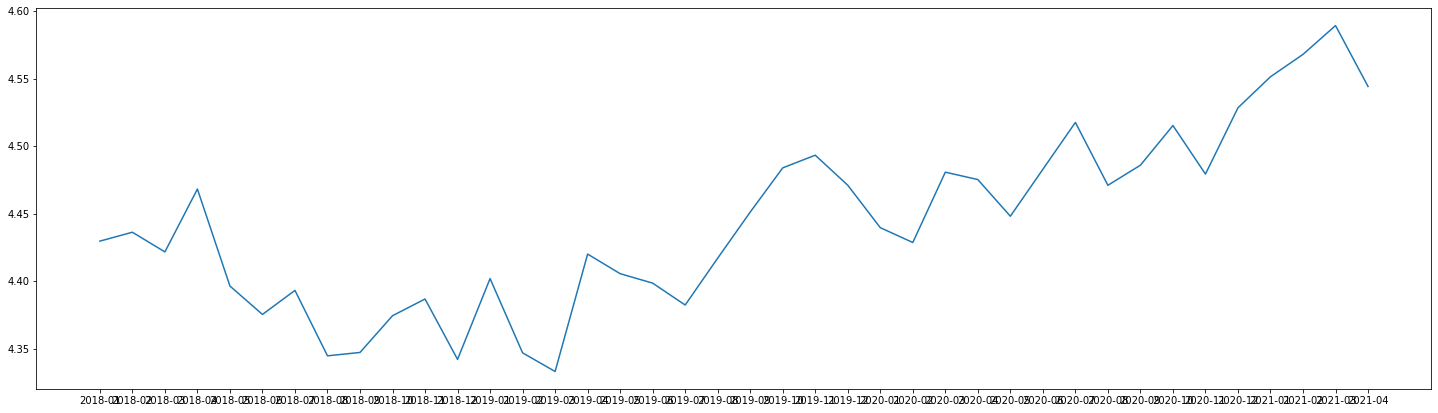

In [140]:
#Gives the plotted graph a size -> 25 length and 7 height
plt.figure(figsize=(25,7))

#plot function takes a list of x and y coordinates
#We plot the months w.r.t the mean ratings per month
plt.plot(mon_avg.index, mon_avg["Rating"])

## Average rating and count per month by course

In [141]:
#Create a new column for the month which is taken from the timestamp datetime object
#This is done so we can then group data by the month value
#We split the timestamp using strftime to get year and month (Otherwise same months in different years count as one)
#%Y gets time and %m gets the month value
df["Month"] = df["Timestamp"].dt.strftime("%Y-%m")

#Group the data by the Month column and the Course Name column and find its mean
#We then unstack the data to make it have better structure because we have two index columns
mon_avg_course = df.groupby(["Month", "Course Name"]).mean().unstack()

#Thus we get a dataframe with the month column and the course name column as the index
#The mean ratings are per month per course
mon_avg_course

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

In [142]:
#Shows that we have more than 1 Index -> Indexes are Month column and the course name column
#And mon_avg_course.columns returns only "Rating"
mon_avg_course.index

Index(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04'],
      dtype='object', name='Month')

<AxesSubplot:xlabel='Month'>

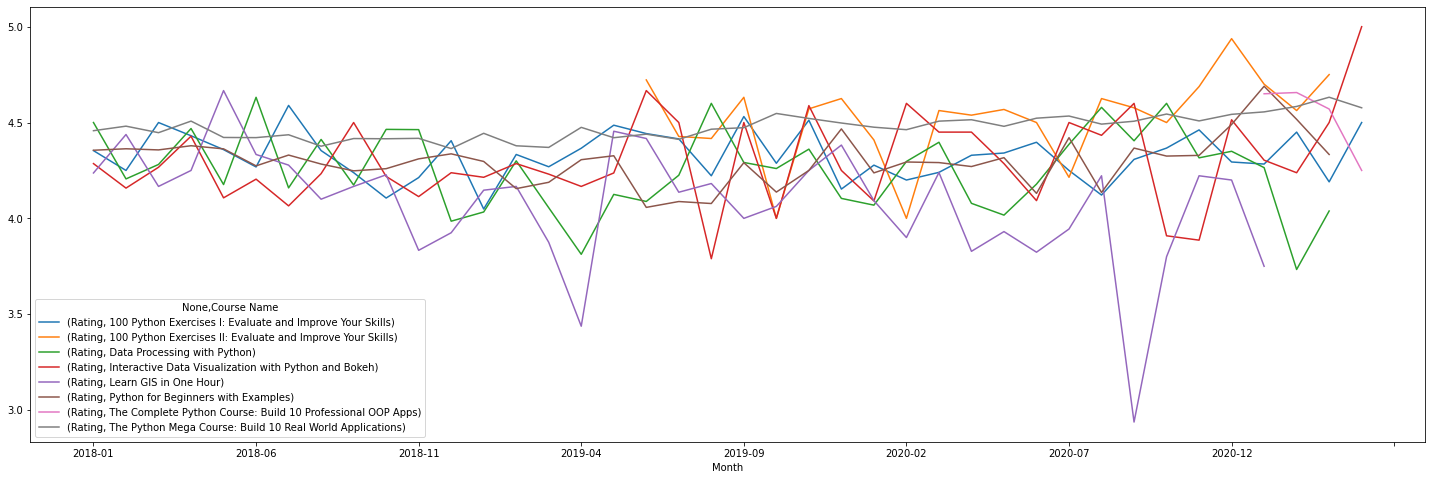

In [143]:
#plot function directly on dataframe
#We plot the months w.r.t the mean ratings per month for each course and give the graph a particular size
mon_avg_course.plot(figsize=(25,8))

In [144]:
#Create a new column for the month which is taken from the timestamp datetime object
#This is done so we can then group data by the month value
#We split the timestamp using strftime to get year and month (Otherwise same months in different years count as one)
#%Y gets time and %m gets the month value
df["Month"] = df["Timestamp"].dt.strftime("%Y-%m")

#Group the data by the Month column and the Course Name column and count its data for all ratings
#We then unstack the data to make it have better structure because we have two index columns
mon_avg_course = df.groupby(["Month", "Course Name"])["Rating"].count().unstack()

#Thus we get a dataframe with the month column and the course name column as the index
#The count of ratings are per month per course
mon_avg_course

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,58.0,NaN,24.0,35.0,19.0,249.0,NaN,1079.0
2018-02,36.0,NaN,17.0,19.0,8.0,252.0,NaN,766.0
2018-03,46.0,NaN,16.0,15.0,6.0,273.0,NaN,793.0
2018-04,29.0,NaN,16.0,21.0,8.0,285.0,NaN,742.0
2018-05,46.0,NaN,17.0,28.0,6.0,324.0,NaN,892.0
2018-06,41.0,NaN,19.0,22.0,12.0,356.0,NaN,870.0
2018-07,28.0,NaN,22.0,23.0,9.0,377.0,NaN,744.0
2018-08,41.0,NaN,17.0,15.0,20.0,307.0,NaN,753.0
2018-09,44.0,NaN,23.0,17.0,15.0,369.0,NaN,658.0


<AxesSubplot:xlabel='Month'>

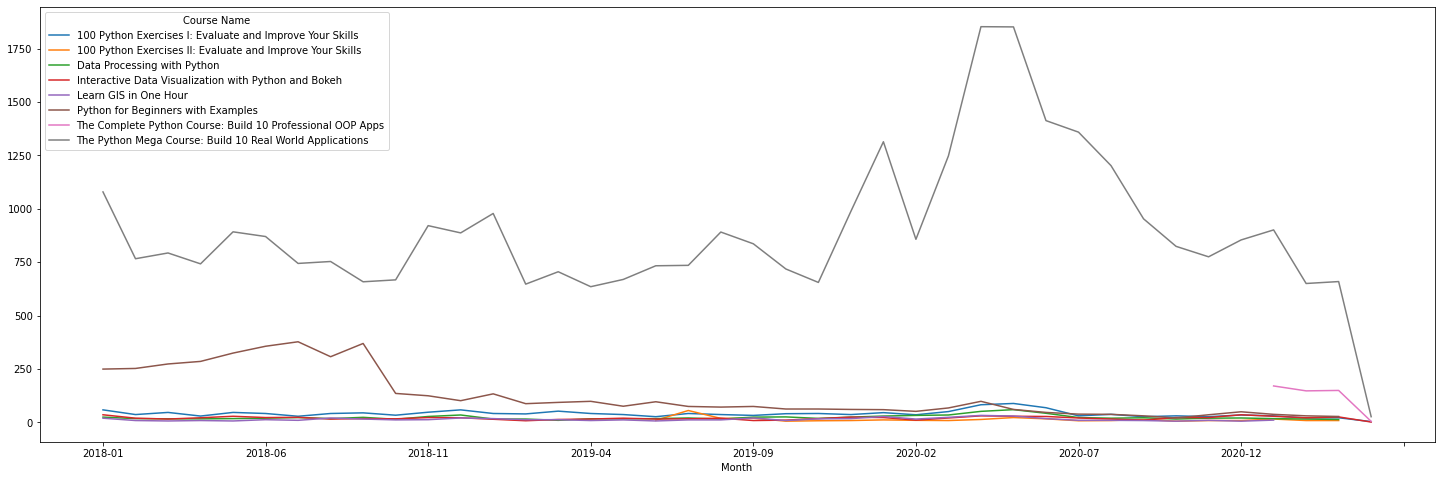

In [145]:
#plot function directly on dataframe
#We plot the months w.r.t the count of ratings per month for each course and give the graph a particular size
mon_avg_course.plot(figsize=(25,8))

## What day of the week are people most positive

In [146]:
#Create a new column for the days of the Week which are taken from the timestamp datetime object
#This is done so we can then group data by the weekday value
#We split the timestamp using strftime to get the Weekday using %A
df["Weekday"] = df["Timestamp"].dt.strftime("%A")

#Create a new column for the day numbers for each day which are taken from the timestamp datetime object
#This is done so we can then group data by the day number values
#We split the timestamp using strftime to get the day number using %w
df["DayNumber"] = df["Timestamp"].dt.strftime("%w")

#We then group all the data by the weekday and daynumber columns and find the mean
wkdy_avg = df.groupby(["Weekday", "DayNumber"]).mean()
#We also sort the data by DayNumber
wkdy_avg = wkdy_avg.sort_values("DayNumber")

#We get a dataframe with the weekdays and daynumbers as indexes and the mean ratings per day
wkdy_avg

,,Rating
Weekday,DayNumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


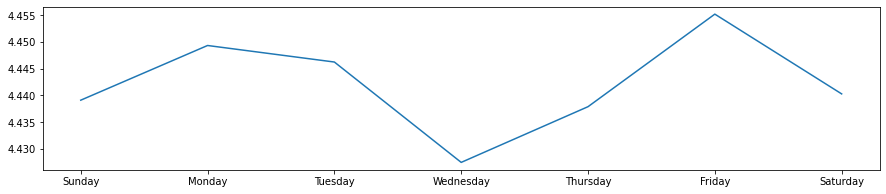

In [147]:
#Gives the plotted graph a size -> 15 length and 3 height
plt.figure(figsize=(15,3))

#plot function takes a list of x and y coordinates
#We plot the Weekdays w.r.t the mean ratings per weekday
plt.plot(wkdy_avg.index.get_level_values(0), wkdy_avg["Rating"])